# Environment Setup and Dataset Preparation

In [ ]:
#Kaggle API Configuration
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Check for GPU Availability
import torch
print("CUDA available:", torch.cuda.is_available())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

CUDA available: True
Using device: cuda


In [ ]:
# Clone Zero-DCE repository
!git clone https://github.com/Li-Chongyi/Zero-DCE.git
%cd Zero-DCE


Cloning into 'Zero-DCE'...
remote: Enumerating objects: 236, done.
remote: Counting objects: 100% (236/236), done.
remote: Compressing objects: 100% (189/189), done.
remote: Total 236 (delta 43), reused 225 (delta 41), pack-reused 0 (from 0)
Receiving objects: 100% (236/236), 30.89 MiB | 9.24 MiB/s, done.
Resolving deltas: 100% (43/43), done.
/content/Zero-DCE


In [ ]:
# Download Kaggle Exdark dataset
!kaggle datasets download -d washingtongold/exdark-dataset


Dataset URL: https://www.kaggle.com/datasets/washingtongold/exdark-dataset
License(s): unknown
 98% 1.35G/1.39G [00:08<00:00, 236MB/s]
100% 1.39G/1.39G [00:08<00:00, 171MB/s]
checkdir:  cannot create extraction directory: .test_data/ExDark
           No such file or directory


#  📂 Dataset Folder Organization

In [ ]:
!mkdir -p ./Zero-DCE_code/data/test_data/ExDark

In [ ]:
!unzip -q exdark-dataset.zip -d ./Zero-DCE_code/data/test_data/ExDark # Unzip ExDark Dataset into the default test_data directory used by lowlight_test.py /data/test_data

replace ./Zero-DCE_code/data/test_data/ExDark/Bicycle/2015_00001.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: ls: cannot access './content/Zero-DCE/Zero-DCE_code/data/test_data': No such file or directory


In [ ]:
!ls /content/Zero-DCE/Zero-DCE_code/data/test_data/ExDark

Bicycle  Boat  Bottle  Bus  Car  Cat  Chair  Cup  Dog  Motorbike  People  Table


In [ ]:
#Copy all .jpg files from subfolders into a single 'ExDark_flat' folder
!mkdir -p ./Zero-DCE_code/data/test_data/ExDark/ExDark_flat
!find ./Zero-DCE_code/data/test_data/ExDark -name "*.jpg" -exec cp {} ./Zero-DCE_code/data/test_data/ExDark/ExDark_flat \;

cp: './Zero-DCE_code/data/test_data/ExDark/ExDark_flat/2015_06423.jpg' and './Zero-DCE_code/data/test_data/ExDark/ExDark_flat/2015_06423.jpg' are the same file
cp: './Zero-DCE_code/data/test_data/ExDark/ExDark_flat/2015_05291.jpg' and './Zero-DCE_code/data/test_data/ExDark/ExDark_flat/2015_05291.jpg' are the same file
cp: './Zero-DCE_code/data/test_data/ExDark/ExDark_flat/2015_01413.jpg' and './Zero-DCE_code/data/test_data/ExDark/ExDark_flat/2015_01413.jpg' are the same file
cp: './Zero-DCE_code/data/test_data/ExDark/ExDark_flat/2015_01837.jpg' and './Zero-DCE_code/data/test_data/ExDark/ExDark_flat/2015_01837.jpg' are the same file
cp: './Zero-DCE_code/data/test_data/ExDark/ExDark_flat/2015_05372.jpg' and './Zero-DCE_code/data/test_data/ExDark/ExDark_flat/2015_05372.jpg' are the same file
cp: './Zero-DCE_code/data/test_data/ExDark/ExDark_flat/2015_01290.jpg' and './Zero-DCE_code/data/test_data/ExDark/ExDark_flat/2015_01290.jpg' are the same file
cp: './Zero-DCE_code/data/test_data/ExDa

In [ ]:
!mv ./Zero-DCE_code/data/test_data/ExDark/ExDark_flat ./Zero-DCE_code/data/test_data/ExDark_flat # Move 'ExDark_flat' folder to the default test path used by lowlight_test.py /data/test_data

# Run Zero-DCE

In [ ]:
!python lowlight_test.py

Görüntülenen çıkış son 5000 satıra kısaltıldı.
0.0012438297271728516
data/test_data/ExDark_flat/2015_05459.jpg
0.005461215972900391
data/test_data/ExDark_flat/2015_02968.jpg
0.0053369998931884766
data/test_data/ExDark_flat/2015_05878.jpg
0.0018513202667236328
data/test_data/ExDark_flat/2015_01490.jpg
0.005532503128051758
data/test_data/ExDark_flat/2015_01049.jpg
0.006520509719848633
data/test_data/ExDark_flat/2015_03250.jpg
0.0012557506561279297
data/test_data/ExDark_flat/2015_04124.jpg
0.00548100471496582
data/test_data/ExDark_flat/2015_00653.jpg
0.0012061595916748047
data/test_data/ExDark_flat/2015_04218.jpg
0.0012636184692382812
data/test_data/ExDark_flat/2015_05306.jpg
0.0012807846069335938
data/test_data/ExDark_flat/2015_02462.jpg
0.005563974380493164
data/test_data/ExDark_flat/2015_02232.jpg
0.0012145042419433594
data/test_data/ExDark_flat/2015_05858.jpg
0.001300811767578125
data/test_data/ExDark_flat/2015_02526.jpg
0.002208709716796875
data/test_data/ExDark_flat/2015_06933.jpg
0

# Visualize Original and Enhanced Images

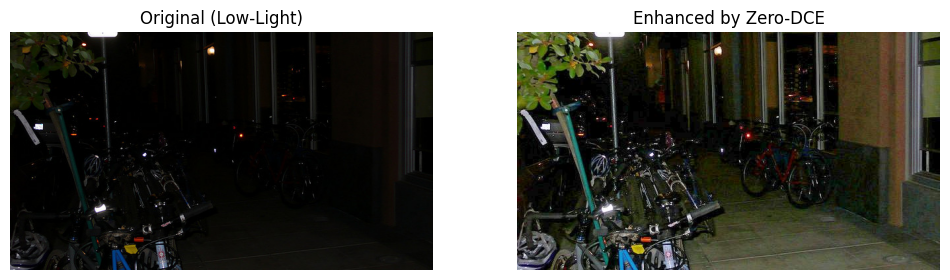

In [ ]:
import matplotlib.pyplot as plt
import cv2
import glob

sample = glob.glob('/content/Zero-DCE/Zero-DCE_code/data/test_data/ExDark_flat/*.jpg')[0]
enhanced = sample.replace('test_data/ExDark_flat', 'result/ExDark_flat')

orig = cv2.cvtColor(cv2.imread('/content/Zero-DCE/Zero-DCE_code/data/test_data/ExDark_flat/2015_00004.jpg'), cv2.COLOR_BGR2RGB)
enh = cv2.cvtColor(cv2.imread('/content/Zero-DCE/Zero-DCE_code/data/result/ExDark_flat/2015_00004.jpg'), cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Original (Low-Light)")
plt.imshow(orig)
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Enhanced by Zero-DCE")
plt.imshow(enh)
plt.axis('off')
plt.show()